<a href="https://colab.research.google.com/github/Aashi779/DeepLearningwithPytorch/blob/main/HumanActionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

os.environ["KAGGLE_USERNAME"] = "aashig30"
os.environ["KAGGLE_KEY"] = "635efb3d93cf01e9749c455d776c3f41"

!kaggle datasets download meetnagadia/human-action-recognition-har-dataset

 98% 290M/297M [00:03<00:00, 118MB/s]
100% 297M/297M [00:03<00:00, 99.0MB/s]


In [56]:
# !unzip human-action-recognition-har-dataset.zip

In [37]:
# to read images data - PIL, opencv libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## EXPLORE DATASET

In [7]:
train_path = "Human Action Recognition/train"
test_path = "Human Action Recognition/test"

In [21]:
random_img = train_path + "/" + "Image_234.jpg"


In [22]:
# image object
img = cv2.imread(random_img)

In [23]:
type(img)

numpy.ndarray

In [24]:
img.shape

(281, 179, 3)

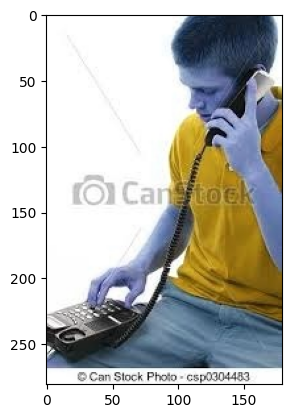

In [25]:
plt.imshow(img)
plt.show()

In [26]:
df = pd.read_csv("Human Action Recognition/Training_set.csv")

In [27]:
df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [28]:
df.iloc[233]

filename    Image_234.jpg
label             calling
Name: 233, dtype: object

In [31]:
# we need an array to read data
# read all images one by one
# here we don't have categorized data

filenames = df['filename'].values

In [32]:
filenames[:10]

array(['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg',
       'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg',
       'Image_9.jpg', 'Image_10.jpg'], dtype=object)

In [36]:
df['label'][0]

'sitting'

In [45]:
def load_data(path, df):
  images_list = []
  labels_list = []
  for i in tqdm(range(len(filenames))):
    # concat train_path with image name
    img_path = path + "/" + filenames[i]
    # fetch image label from data frame of current image
    img_label = df['label'][i]
    # read image using opencv
    img = cv2.imread(img_path)
    # resize image because images might be of different dimensions
    # in order to maintain array, we have to resize all the images in same dimension
    img = cv2.resize(img, (150,150))
    # store images one by one in your list
    images_list.append(img)
    labels_list.append(img_label)

  images_arr = np.asarray(images_list)
  labels_arr = np.asarray(labels_list)

  return images_arr, labels_arr


In [46]:
train_df = pd.read_csv("Human Action Recognition/Training_set.csv")
# test_df = pd.read_csv("Human Action Recognition/Testing_set.csv")

In [54]:
test_df.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [47]:
train_images, train_labels = load_data(train_path, train_df)

100%|██████████| 12600/12600 [00:13<00:00, 960.84it/s]


In [48]:
train_images.shape

(12600, 150, 150, 3)

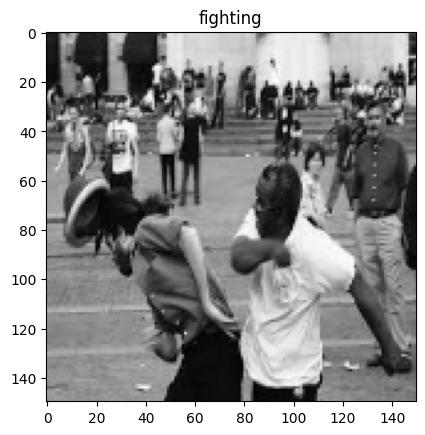

In [52]:
plt.imshow(train_images[900])
plt.title(train_labels[900])
plt.show()

In [55]:
# test_images, test_labels = load_data(test_path, test_df)
# labels not given, so will divide the training data in test and train data